In [1]:
import numpy as np
import matplotlib.pyplot as plt
% matplotlib inline
plt.rcParams["figure.dpi"] = 200
np.set_printoptions(precision=3, suppress=True)
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import scale, StandardScaler
import matplotlib
matplotlib.use('Agg')
import matplotlib.pyplot as plt

import tensorflow as tf
from keras.models import Sequential
import keras
from keras.wrappers.scikit_learn import KerasClassifier, KerasRegressor
from sklearn.model_selection import GridSearchCV
from keras.layers import Dense, Activation
from keras.models import Sequential

In [16]:
from sklearn import datasets
iris = datasets.load_iris()

In [32]:
X = iris.data
Y = iris.target

In [33]:
X_train,X_test,y_train,y_test = train_test_split(X,Y, random_state = 0, stratify=Y)

In [37]:
type(y_train)

numpy.ndarray

In [19]:

print X_train.shape
## convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, 3)
y_test = keras.utils.to_categorical(y_test, 3)

(112, 4)


In [20]:
def make_model(optimizer="adam", hidden_size=64,activation='relu'):
    model = Sequential([
        Dense(hidden_size, input_dim=4),
        Activation('relu'),
        ## second hidden layer
        Dense(hidden_size),
        Activation('relu'),
        ## hace three classes
        Dense(3),
        Activation('softmax'),
    ])
    ##multi-classifier
    model.compile(optimizer=optimizer, loss="categorical_crossentropy", metrics=['accuracy'])
    return model
clf = KerasClassifier(make_model)
param_grid = {'epochs': [10, 20],
              'activation':['softmax', 'relu', 'tanh', 'sigmoid', 'linear'],
              'hidden_size': [64, 256, 526],
              'optimizer':['adam','rmsprop']}
grid = GridSearchCV(clf, param_grid=param_grid, cv=5)

In [21]:
grid.fit(X_train, y_train)

Epoch 1/10
89/89 [==============================] - 0s - loss: 1.1977 - acc: 0.3708     
Epoch 2/10
89/89 [==============================] - 0s - loss: 1.0492 - acc: 0.3708     
Epoch 3/10
89/89 [==============================] - 0s - loss: 0.9831 - acc: 0.6404     
Epoch 4/10
89/89 [==============================] - 0s - loss: 0.9239 - acc: 0.9551     
Epoch 5/10
89/89 [==============================] - 0s - loss: 0.8701 - acc: 0.7303     
Epoch 6/10
89/89 [==============================] - 0s - loss: 0.8289 - acc: 0.6966     
Epoch 7/10
89/89 [==============================] - 0s - loss: 0.7968 - acc: 0.6966     
Epoch 8/10
89/89 [==============================] - 0s - loss: 0.7593 - acc: 0.6966     
Epoch 9/10
89/89 [==============================] - 0s - loss: 0.7221 - acc: 0.6966     
Epoch 10/10
23/23 [==============================] - 0s
Epoch 1/10
89/89 [==============================] - 0s - loss: 1.2387 - acc: 0.3371     
Epoch 2/10
89/89 [==============================] - 0s

GridSearchCV(cv=5, error_score='raise',
       estimator=<keras.wrappers.scikit_learn.KerasClassifier object at 0x13e8c1bd0>,
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'epochs': [10, 20], 'activation': ['softmax', 'relu', 'tanh', 'sigmoid', 'linear'], 'hidden_size': [64, 256, 526], 'optimizer': ['adam', 'rmsprop']},
       pre_dispatch='2*n_jobs', refit=True, scoring=None, verbose=0)

In [22]:
res = pd.DataFrame(grid.cv_results_)
res.pivot_table(index=["param_epochs","param_hidden_size","param_optimizer"],
                values=['mean_train_score', "mean_test_score"])

mean_test_score
param_epochs param_hidden_size param_optimizer                 
10           64                adam                    0.746429
                               rmsprop                 0.844643
             256               adam                    0.939286
                               rmsprop                 0.796429
             526               adam                    0.944643
                               rmsprop                 0.819643
20           64                adam                    0.892857
                               rmsprop                 0.907143
             256               adam                    0.958929
                               rmsprop                 0.830357
             526               adam                    0.966071
                               rmsprop                 0.926786

In [23]:
###from the result above, I can find that epoches = 20, hidden_size = 256, optimizer = 'adam', it may be overfitting

In [28]:
model = make_model(optimizer="adam", hidden_size=256)
history = model.fit(X_train, y_train, epochs=20, verbose=1, validation_split=.1)

Train on 100 samples, validate on 12 samples
Epoch 1/20
100/100 [==============================] - 4s - loss: 1.0146 - acc: 0.5500 - val_loss: 0.8040 - val_acc: 0.6667
Epoch 2/20
100/100 [==============================] - 0s - loss: 0.8353 - acc: 0.6500 - val_loss: 0.6894 - val_acc: 0.6667
Epoch 3/20
100/100 [==============================] - 0s - loss: 0.6388 - acc: 0.6900 - val_loss: 0.6953 - val_acc: 0.5833
Epoch 4/20
100/100 [==============================] - 0s - loss: 0.6217 - acc: 0.6800 - val_loss: 0.5945 - val_acc: 0.5833
Epoch 5/20
100/100 [==============================] - 0s - loss: 0.4959 - acc: 0.8400 - val_loss: 0.5085 - val_acc: 0.6667
Epoch 6/20
100/100 [==============================] - 0s - loss: 0.4756 - acc: 0.6700 - val_loss: 0.4638 - val_acc: 0.8333
Epoch 7/20
100/100 [==============================] - 0s - loss: 0.4130 - acc: 0.8500 - val_loss: 0.4449 - val_acc: 0.9167
Epoch 8/20
100/100 [==============================] - 0s - loss: 0.3899 - acc: 0.9100 - val_lo

In [29]:
score = model.evaluate(X_test, y_test, verbose=1)

32/38 [========================>.....] - ETA: 0s

In [30]:
score

[0.14011603476185547, 0.97368421052631582]

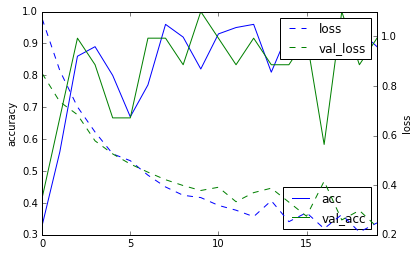

In [27]:
df = pd.DataFrame(history.history)
df[['acc', 'val_acc']].plot()
plt.ylabel("accuracy")
df[['loss', 'val_loss']].plot(linestyle='--', ax=plt.twinx())
plt.ylabel("loss")